In [29]:
import numpy as np
import pandas as pd

In [30]:
df=pd.read_csv(r"C:\Users\Neha\Downloads\mnist_784_csv.csv")

In [31]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [32]:
df.tail()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
69999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [33]:
x=df.drop(columns=['class']).values
y=df['class'].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
x_train=x_train/255.0
x_test=x_test/255.0

In [38]:
import tensorflow as tf

y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [40]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [42]:
x_train.shape

(56000, 28, 28, 1)

In [43]:
def add_noise(images):
    noise_factor=0.5
    noisy_image=images+noise_factor*np.random.randn(*images.shape)
    return np.clip(noisy_image,0.,1.)

x_train_noisy=add_noise(x_train)
x_test_noisy=add_noise(x_test)

In [48]:
from tensorflow.keras import layers,models

def build_autoencoder():
    model=models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28,1)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(28*28,activation='sigmoid'))
    model.add(layers.Reshape((28,28,1)))
    
    return model

In [49]:
autoencoder=build_autoencoder()

In [50]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,batch_size=128,validation_data=(x_test_noisy,x_test))

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0771 - val_loss: 0.0349
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0315 - val_loss: 0.0258
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0244 - val_loss: 0.0219
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0211 - val_loss: 0.0199
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0193 - val_loss: 0.0190
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183 - val_loss: 0.0182
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0176 - val_loss: 0.0177
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171 - val_loss: 0.0174
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0168 - val_loss: 0.0172
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0166 - val_loss: 0.0170


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


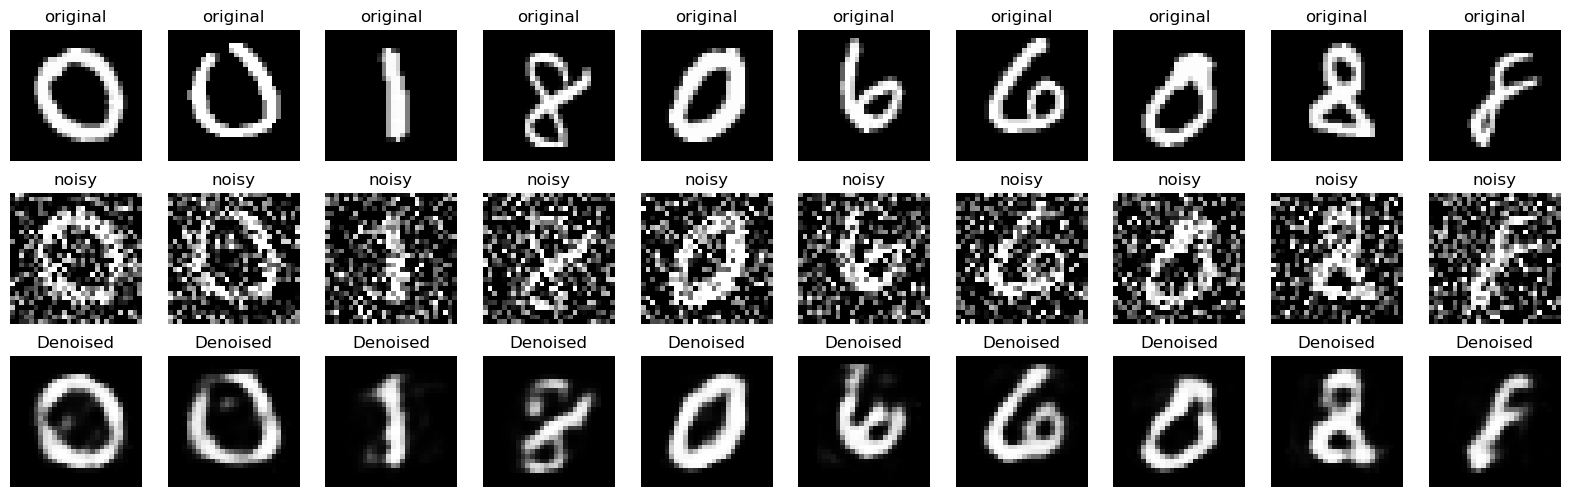

In [54]:
import matplotlib.pyplot as plt

denoised_images = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,6))

for i in range(n):
  ax= plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title("original")
  plt.axis('off')

  ax= plt.subplot(3,n,i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='gray')
  plt.title("noisy")
  plt.axis('off')

  ax= plt.subplot(3,n,i+1+2*n)
  plt.imshow(denoised_images[i].reshape(28,28),cmap='gray')
  plt.title("Denoised")
  plt.axis('off')

plt.show()